In [1]:
import seaborn as sns
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMFMPYUN.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
#print(kfont)
matplotlib.rcParams['font.family'] = [kfont]+current_font_list

pd_data = pd.read_csv('park.csv')
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17581 entries, 0 to 17580
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지자체명    17581 non-null  object 
 1   공원구분    17581 non-null  object 
 2   공원명     17581 non-null  object 
 3   위도      17548 non-null  float64
 4   경도      17546 non-null  float64
 5   공원면적    17581 non-null  float64
 6   지정고시일   14512 non-null  object 
dtypes: float64(3), object(4)
memory usage: 961.6+ KB


# heatmap
- 지자체명 vs 공원구분
- 평균 공원면적
* groupby 이용

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7136\4266842357.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = g1.mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_7136\4266842357.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원면적')


<Axes: xlabel='공원구분', ylabel='지자체명'>

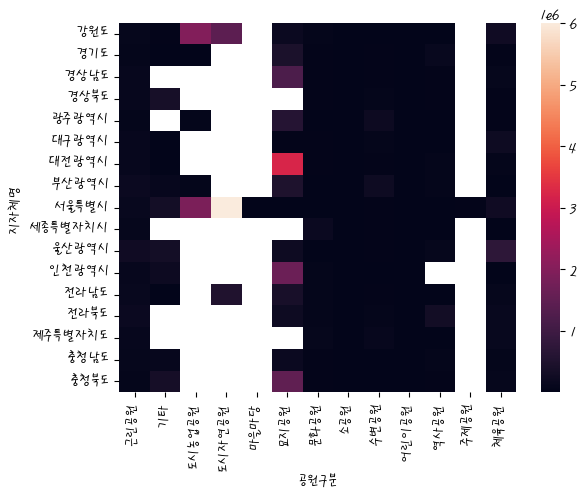

In [14]:
g1 = pd_data.groupby(['지자체명','공원구분'])
df_group = g1.mean()
df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원면적')
sns.heatmap(df_group_pv)

In [18]:
df_group_pv.info()
df_group_pv.head(10)
df_group_pv.count()


<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원도 to 충청북도
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   근린공원    17 non-null     float64
 1   기타      12 non-null     float64
 2   도시농업공원  5 non-null      float64
 3   도시자연공원  3 non-null      float64
 4   마을마당    1 non-null      float64
 5   묘지공원    14 non-null     float64
 6   문화공원    17 non-null     float64
 7   소공원     17 non-null     float64
 8   수변공원    17 non-null     float64
 9   어린이공원   17 non-null     float64
 10  역사공원    16 non-null     float64
 11  주제공원    1 non-null      float64
 12  체육공원    17 non-null     float64
dtypes: float64(13)
memory usage: 1.9+ KB


공원구분
근린공원      17
기타        12
도시농업공원     5
도시자연공원     3
마을마당       1
묘지공원      14
문화공원      17
소공원       17
수변공원      17
어린이공원     17
역사공원      16
주제공원       1
체육공원      17
dtype: int64

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7136\750920989.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원명')


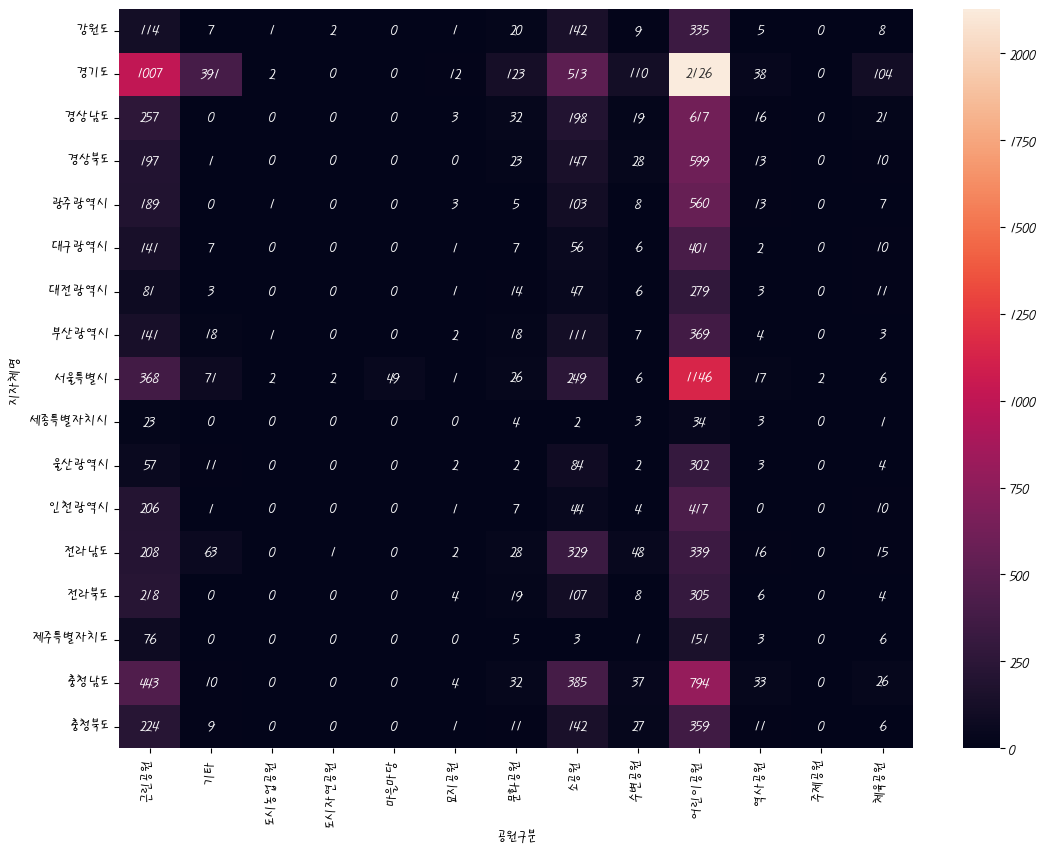

In [28]:
g2 = pd_data.groupby(['지자체명','공원구분'])
df_group = g2.count()
#df_group
df_group_pv = df_group.reset_index().pivot('지자체명','공원구분','공원명')
df_group_pv = df_group_pv.fillna(0.0)

fig = plt.figure(figsize = (6.4*2,4.8*2))
ax1 = fig.add_subplot()
r = sns.heatmap(df_group_pv,annot=True,fmt='.0f',ax = ax1)